
## 1.前言
Matplotlib是一个python的 2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。通过Matplotlib，开发者可以仅需要几行代码，便可以生成绘图，直方图，功率谱，条形图，错误图，散点图等。
参考文档 https://zhuanlan.zhihu.com/p/33270402

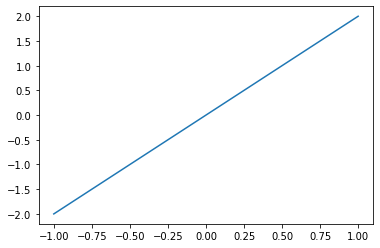

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,50)#从(-1,1)均匀取50个点
y = 2 * x

plt.plot(x,y)
plt.show()

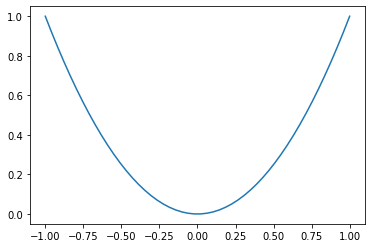

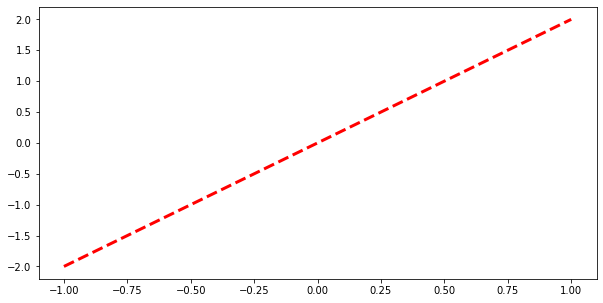

In [25]:
x = np.linspace(-1,1,50)
y1 = x ** 2 
y2 = x * 2
#这个是第一个figure对象,下面的内容都会在第一个figure中显示
plt.figure()
plt.plot(x,y1)
#这里第二个figure对象
plt.figure(num = 3,figsize = (10,5))
#plt.title("test")
#plt.plot(x,y2)
plt.plot(x,y2,color = 'red',linewidth = 3.0,linestyle = '--')
plt.show()

这里需要注意的是：

我们看上面的每个图像的窗口，可以看出figure并没有从1开始然后到2，这是因为我们在创建第二个figure对象的时候，指定了一个num = 3的参数，所以第二个窗口标题上显示的figure3(在vscode中没有显示)。
对于每一个窗口，我们也可以对他们分别去指定窗口的大小。也就是figsize参数。
若我们想让他们的线有所区别，我们可以用下面语句进行修改

plt.plot(x,y2,color = 'red',linewidth = 3.0,linestyle = '--')

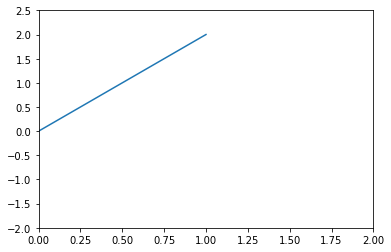

In [26]:
#在plt.show()之前添加

x = np.linspace(-1,1,50)
y = x *2
plt.plot(x,y)
#设置坐标轴的范围
plt.xlim((0,2))
plt.ylim((-2,2.5))

plt.show()

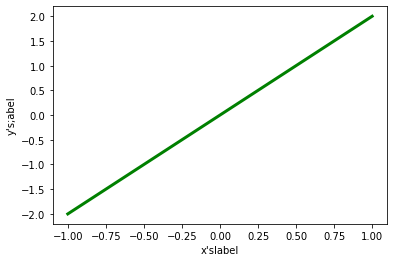

In [27]:
#给横纵坐标设置名称：
x = np.linspace(-1,1,50)
y = x * 2

plt.xlabel("x'slabel")#x轴上的名字
plt.ylabel("y's;abel")#y轴上的名字
plt.plot(x,y,color='green',linewidth = 3)
plt.show()

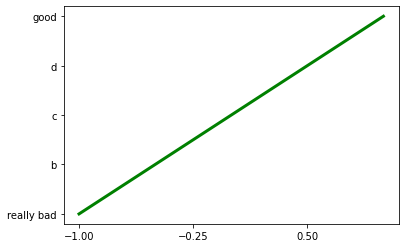

In [28]:
#把坐标轴换成不同的单位：
new_ticks = np.linspace(-1,2,5)
plt.xticks(new_ticks)
#在对应坐标处更换名称
plt.yticks([-2,-1,0,1,2],['really bad','b','c','d','good'])
plt.plot(x,y,color='green',linewidth = 3)
plt.show()

注意：

我们如果要使用空格的话需要进行对空格的转义"\ "这种转义才能输出空格；

我们可以在里面加一些数学的公式，如"\alpha"来表示 [公式] 。

如何去更换坐标原点，坐标轴呢？我们在plt.show()之前：

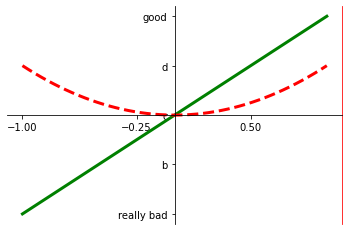

In [29]:
y1 = x**2
new_ticks = np.linspace(-1,2,5)
plt.xticks(new_ticks)
#在对应坐标处更换名称
#plt.yticks([-2,-1,0,1,2],[r'$really\ bad$',r'$b$',r'$c\ \alpha$','d','good'])
plt.yticks([-2,-1,0,1,2],['really bad','b','c','d','good'])
plt.plot(x,y,color='green',linewidth = 3)
plt.plot(x,y1,color = 'red',linewidth = 3.0,linestyle = '--')

#gca = 'get current axis'
#获取当前的这四个轴
ax = plt.gca()
#设置脊梁(也就是包围在图标四周的默认黑线)
#所以设置脊梁的时候，一共有四个方位
ax.spines['right'].set_color('r')
ax.spines['top'].set_color('none')

#将底部脊梁作为x轴
ax.xaxis.set_ticks_position('bottom')
#ACCEPTS:['top' | 'bottom' | 'both'|'default'|'none']

#设置x轴的位置(设置底的时候依据的是y轴)
ax.spines['bottom'].set_position(('data',0))
#the 1st is in 'outward' |'axes' | 'data'
#axes : precentage of y axis
#data : depend on y data

ax.yaxis.set_ticks_position('left')
# #ACCEPTS:['top' | 'bottom' | 'both'|'default'|'none']

#设置左脊梁(y轴)依据的是x轴的0位置
ax.spines['left'].set_position(('data',0))

## legend图例
我们很多时候会再一个figures中去添加多条线，那我们如何去区分多条线呢？这里就用到了legend。
```python
l1, = plt.plot(x, y1, label='linear line')
l2, = plt.plot(x, y2, color='red', linewidth=1.0, linestyle='--', label='square line')


plt.legend(handles = [l1,l2],labels = ['up','down'],loc = 'best')
#the ',' is very important in here l1, = plt...and l2, = plt...for this step
"""legend( handles=(line1, line2, line3),
           labels=('label1', 'label2', 'label3'),
           'upper right')
    shadow = True 设置图例是否有阴影
    The *loc* location codes are::
          'best' : 0,         
          'upper right'  : 1,
          'upper left'   : 2,
          'lower left'   : 3,
          'lower right'  : 4,
          'right'        : 5,
          'center left'  : 6,
          'center right' : 7,
          'lower center' : 8,
          'upper center' : 9,
          'center'       : 10,"""

```

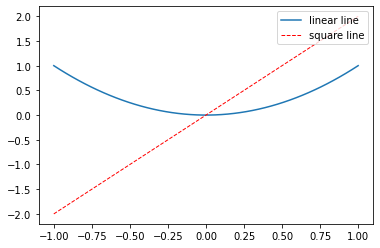

In [30]:
l1, = plt.plot(x, y1, label='linear line')
l2, = plt.plot(x, y2, color='red', linewidth=1.0, linestyle='--', label='square line')

#简单的设置legend(设置位置)
#位置在右上角
plt.legend(loc = 'upper right')

这里需要注意的是：

如果我们没有在legend方法的参数中设置labels，那么就会使用画线的时候，也就是plot方法中的指定的label参数所指定的名称，当然如果都没有的话就会抛出异常；

其实我们plt.plot的时候返回的是一个线的对象，如果我们想在handle中使用这个对象，就必须在返回的名字的后面加一个","号；

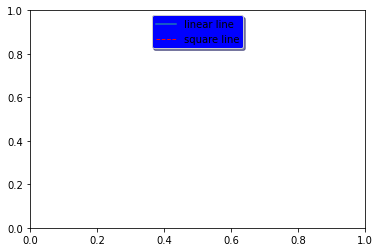

In [41]:
legend = plt.legend(handles = [l1,l2],loc = 'upper center',shadow = True)
#legend = plt.legend(handles = [l1,l2],labels = ['hu','tang'],loc = 'upper center',shadow = True)
frame = legend.get_frame()
frame.set_facecolor('b')#或者0.9...

## 在图片上加一些标注annotation

-----方式一-----
-----方式二-----


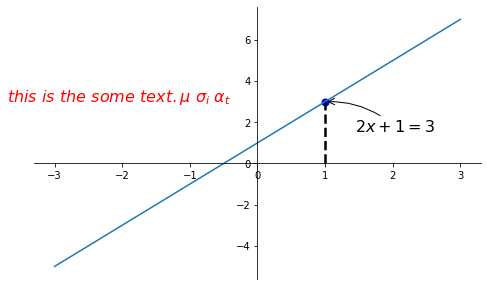

In [43]:
x = np.linspace(-3,3,50)
y = 2*x + 1

plt.figure(num = 1,figsize =(8,5))
plt.plot(x,y)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#将底下的作为x轴
ax.xaxis.set_ticks_position('bottom')
#并且data，以y轴的数据为基本
ax.spines['bottom'].set_position(('data',0))

#将左边的作为y轴
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

print("-----方式一-----")
x0 = 1
y0 = 2*x0 + 1
plt.plot([x0,x0],[0,y0],'k--',linewidth = 2.5)
plt.scatter([x0],[y0],s = 50,color='b')
plt.annotate(r'$2x+1 = %s$'% y0,xy = (x0,y0),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 16
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.2"))
print("-----方式二-----")
plt.text(-3.7,3,r'$this\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size':16,'color':'r'})
         
plt.show()


```python
plt.annotate(r'$2x+1 = %s$'% y0,xy = (x0,y0),xycoords = 'data',
             xytext=(+30,-30),textcoords = 'offset points',fontsize = 16
             ,arrowprops = dict(arrowstyle='->',
                                connectionstyle="arc3,rad=.2"))
```
### 注意：

* xy就是需要进行注释的点的横纵坐标；
* xycoords = 'data'说明的是要注释点的xy的坐标是以横纵坐标轴为基准的；
* xytext=(+30,-30)和textcoords='data'说明了这里的文字是基于标注的点的x坐标的偏移+30以及标注点y坐标-30位置，就是我们要进行注释文字的位置；
* fontsize = 16就说明字体的大小；
* arrowprops = dict()这个是对于这个箭头的描述，arrowstyle='->'这个是箭头的类型，connectionstyle="arc3,rad=.2"这两个是描述我们的箭头的弧度以及角度的。
```python
print("-----方式二-----")
plt.text(-3.7,3,r'$this\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size':16,'color':'r'})
```

## 下面这里先介绍一下plot中的一个参数

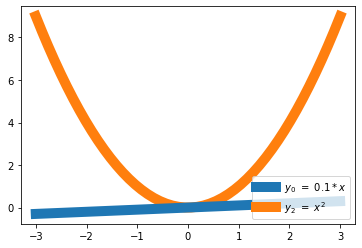

In [47]:
x = np.linspace(-3,3,50)
y1 = 0.1*x
y2 = x**2

plt.figure()
#zorder控制绘图顺序
plt.plot(x,y1,linewidth = 10,zorder = 2,label = r'$y_0\ =\ 0.1*x$')
plt.plot(x,y2,linewidth = 10,zorder = 1,label = r'$y_2\ =\ x^{2}$')

# #zorder控制绘图顺序
# plt.plot(x,y1,linewidth = 10,zorder = 1,label = r'$y_1\ =\ 0.1*x$')
# plt.plot(x,y2,linewidth = 10,zorder = 2,label = r'$y_2\ =\ x^{2}$')


plt.legend(loc = 'lower right')

plt.show()

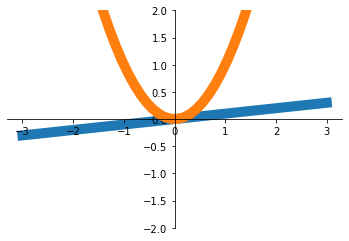

In [48]:

x = np.linspace(-3,3,50)
y1 = 0.1*x
y2 = x**2

plt.figure()
#zorder控制绘图顺序
plt.plot(x,y1,linewidth = 10,zorder = 1,label = r'$y_1\ =\ 0.1*x$')
plt.plot(x,y2,linewidth = 10,zorder = 2,label = r'$y_2\ =\ x^{2}$')

plt.ylim(-2,2)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

从上面看，我们可以看见我们轴上的坐标被掩盖住了，那么我们怎么去修改他呢？
```python
print(ax.get_xticklabels())
print(ax.get_yticklabels())

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor = 'white',edgecolor='none',alpha = 0.8,zorder = 2))

<a list of 9 Text xticklabel objects>
<a list of 9 Text yticklabel objects>
```

[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


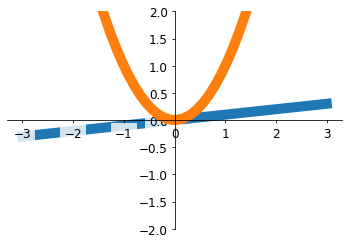

In [49]:
x = np.linspace(-3,3,50)
y1 = 0.1*x
y2 = x**2

plt.figure()
#zorder控制绘图顺序
plt.plot(x,y1,linewidth = 10,zorder = 1,label = r'$y_1\ =\ 0.1*x$')
plt.plot(x,y2,linewidth = 10,zorder = 2,label = r'$y_2\ =\ x^{2}$')

plt.ylim(-2,2)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

print(ax.get_xticklabels())
print(ax.get_yticklabels())

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor = 'white',edgecolor='none',alpha = 0.8,zorder = 2))

plt.show()

这里需要注意：

ax.get_xticklabels()获取得到就是坐标轴上的数字；  
set_bbox()这个bbox就是那坐标轴上的数字的那一小块区域，从结果我们可以很明显的看出来；  
facecolor = 'white',edgecolor='none，第一个参数表示的这个box的前面的背景，边上的颜色。  

## scatter散点图

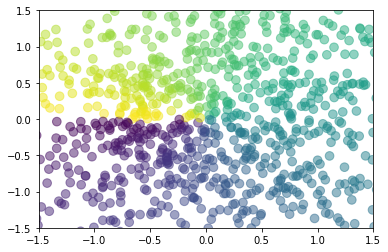

In [50]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)#for color later on

plt.scatter(X,Y,s = 75,c = T,alpha = .5)

plt.xlim((-1.5,1.5))
#plt.xticks([])#ignore xticks
plt.ylim((-1.5,1.5))
#plt.yticks([])#ignore yticks
plt.show()

## 柱状图

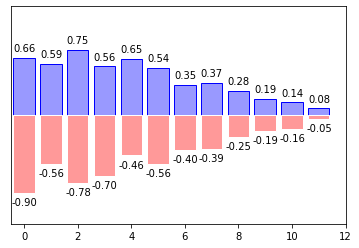

In [52]:
n = 12
X = np.arange(n)
Y1 = (1 - X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1 - X/float(n)) * np.random.uniform(0.5,1.0,n)
#facecolor:表面的颜色;edgecolor:边框的颜色
plt.bar(X,+Y1,facecolor = '#9999ff',edgecolor = 'white')
plt.bar(X,-Y2,facecolor = '#ff9999',edgecolor = 'white')
#描绘text在图表上
# plt.text(0 + 0.4, 0 + 0.05,"huhu")
for x,y in zip(X,Y1):
    #ha : horizontal alignment
    #va : vertical alignment
    plt.text(x + 0.01,y+0.05,'%.2f'%y,ha = 'center',va='bottom')

for x,y in zip(X,Y2):
    # ha : horizontal alignment
    # va : vertical alignment
    plt.text(x+0.01,-y-0.05,'%.2f'%(-y),ha='center',va='top')

plt.xlim(-.5,n)
plt.yticks([])
plt.ylim(-1.25,1.25)
plt.yticks([])
plt.show()

## Contours等高线图

<ipython-input-53-c1e5dd213185>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X,Y,f(X,Y),8,colors = 'black',linewidth = .5)


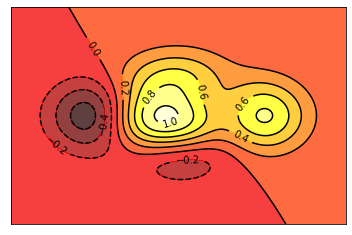

In [53]:
def f(x,y):
    #the height function
    return (1-x/2 + x**5+y**3) * np.exp(-x **2 -y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
#meshgrid函数用两个坐标轴上的点在平面上画网格。
X,Y = np.meshgrid(x,y)

#use plt.contourf to filling contours
#X Y and value for (X,Y) point
#这里的8就是说明等高线分成多少个部分，如果是0则分成2半
#则8是分成10半
#cmap找对应的颜色，如果高=0就找0对应的颜色值，
plt.contourf(X,Y,f(X,Y),8,alpha = .75,cmap = plt.cm.hot)

#use plt.contour to add contour lines
C = plt.contour(X,Y,f(X,Y),8,colors = 'black',linewidth = .5)

#adding label
plt.clabel(C,inline = True,fontsize = 10)

#ignore ticks
plt.xticks([])
plt.yticks([])

plt.show()

## image图片

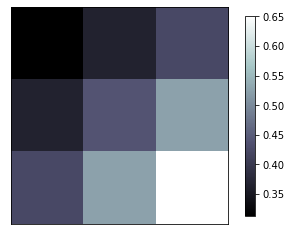

In [55]:
#image data
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

'''
for the value of "interpolation"，check this:
http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
for the value of "origin"= ['upper', 'lower'], check this:
http://matplotlib.org/examples/pylab_examples/image_origin.html
'''
#显示图像
#这里的cmap='bone'等价于plt.cm.bone
plt.imshow(a,interpolation = 'nearest',cmap = 'bone' ,origin = 'upper')
#显示右边的栏
plt.colorbar(shrink = .92)

#ignore ticks
plt.xticks([])
plt.yticks([])

plt.show()

In [5]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import os
input_path = "./img/"
img_fn = os.path.join(input_path, "rabbit.jpg")
img = Image.open(img_fn)
#img.show()
plt.figure(figsize=(100,100))
plt.imshow(img)
plt.show()

## 显示3D数据

<ipython-input-58-93b81d256475>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


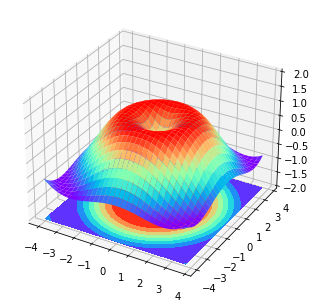

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#X Y value
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
#hight value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
"""
============= ================================================
        Argument      Description
        ============= ================================================
        *X*, *Y*, *Z* Data values as 2D arrays
        *rstride*     Array row stride (step size), defaults to 10
        *cstride*     Array column stride (step size), defaults to 10
        *color*       Color of the surface patches
        *cmap*        A colormap for the surface patches.
        *facecolors*  Face colors for the individual patches
        *norm*        An instance of Normalize to map values to colors
        *vmin*        Minimum value to map
        *vmax*        Maximum value to map
        *shade*       Whether to shade the facecolors
        ============= ================================================
"""

# I think this is different from plt12_contours
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
"""
==========  ================================================
        Argument    Description
        ==========  ================================================
        *X*, *Y*,   Data values as numpy.arrays
        *Z*
        *zdir*      The direction to use: x, y or z (default)
        *offset*    If specified plot a projection of the filled contour
                    on this position in plane normal to zdir
        ==========  ================================================
"""
ax.set_zlim(-2, 2)
plt.show()

## 多图合并展示

使用subplot函数

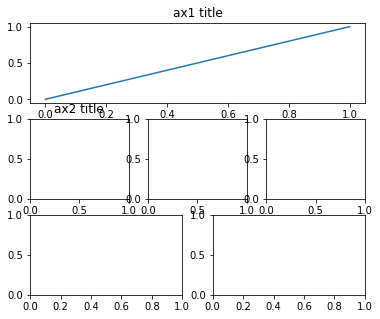

In [60]:
plt.figure(figsize = (6,5))

ax1 = plt.subplot(3,1,1)
ax1.set_title("ax1 title")
plt.plot([0,1],[0,1])

#这种情况下如果再数的话以334为标准了，
#把上面的第一行看成是3个列
ax2 = plt.subplot(334)
ax2.set_title("ax2 title")

ax3 = plt.subplot(335)
ax4 = plt.subplot(336)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

plt.show()

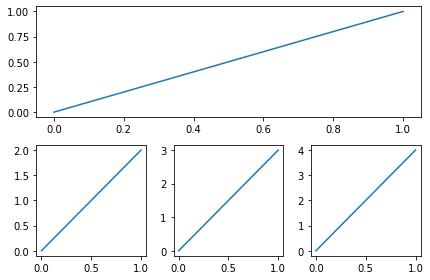

In [61]:
plt.figure(figsize = (6,4))
#plt.subplot(n_rows,n_cols,plot_num)
plt.subplot(211)
# figure splits into 2 rows, 1 col, plot to the 1st sub-fig
plt.plot([0, 1], [0, 1])

plt.subplot(234)
# figure splits into 2 rows, 3 col, plot to the 4th sub-fig
plt.plot([0, 1], [0, 2])

plt.subplot(235)
# figure splits into 2 rows, 3 col, plot to the 5th sub-fig
plt.plot([0, 1], [0, 3])

plt.subplot(236)
# figure splits into 2 rows, 3 col, plot to the 6th sub-fig
plt.plot([0, 1], [0, 4])

plt.tight_layout()
plt.show()

## 分格显示

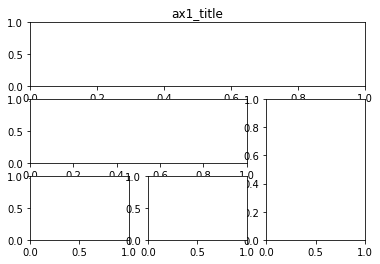

In [62]:
#method 1: subplot2grid
plt.figure()
#第一个参数shape也就是我们网格的形状
#第二个参数loc,位置,这里需要注意位置是从0开始索引的
#第三个参数colspan跨多少列,默认是1
#第四个参数rowspan跨多少行,默认是1
ax1 = plt.subplot2grid((3,3),(0,0),colspan = 3,rowspan = 1)
#如果为他设置一些属性的话，如plt.title,则用ax1的话
#ax1.set_title(),同理可设置其他属性
ax1.set_title("ax1_title")

ax2 = plt.subplot2grid((3,3),(1,0),colspan = 2,rowspan = 1)
ax3 = plt.subplot2grid((3,3),(1,2),colspan = 1,rowspan = 2)
ax4 = plt.subplot2grid((3,3),(2,0),colspan = 1,rowspan = 1)
ax5 = plt.subplot2grid((3,3),(2,1),colspan = 1,rowspan = 1)

plt.show()

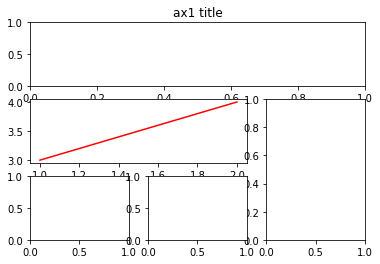

In [63]:
#method 2:gridspec
import matplotlib.gridspec as gridspec

plt.figure()
gs = gridspec.GridSpec(3,3)
#use index from 0
ax1 = plt.subplot(gs[0,:])
ax1.set_title("ax1 title")

ax2 = plt.subplot(gs[1,:2])
ax2.plot([1,2],[3,4],'r')

ax3 = plt.subplot(gs[1:,2:])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

plt.show()

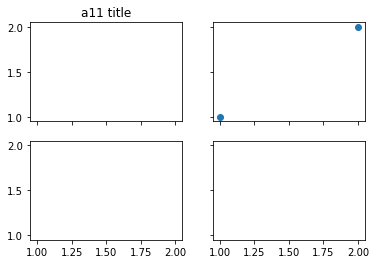

In [64]:
#method 3 :easy to define structure
#这种方式不能生成指定跨行列的那种
import matplotlib.pyplot as plt
#(ax11,ax12),(ax13,ax14)代表了两行
#f就是figure对象,
#sharex：是否共享x轴
#sharey:是否共享y轴
f,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,sharex = True,sharey = True)
ax11.set_title("a11 title")
ax12.scatter([1,2],[1,2])

plt.show()

## 图中图

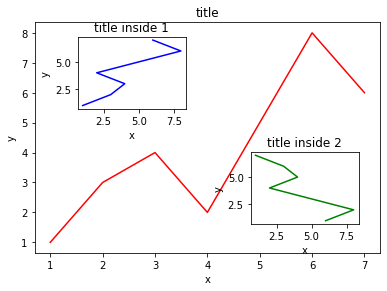

In [65]:
fig = plt.figure()
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]

#below are all percentage
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#使用plt.figure()显示的是一个空的figure
#如果使用fig.add_axes会添加轴
ax1 = fig.add_axes([left, bottom, width, height])# main axes
ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

ax2 = fig.add_axes([0.2, 0.6, 0.25, 0.25])  # inside axes
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

# different method to add axes
####################################
plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(y[::-1], x, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show()

## 次坐标轴

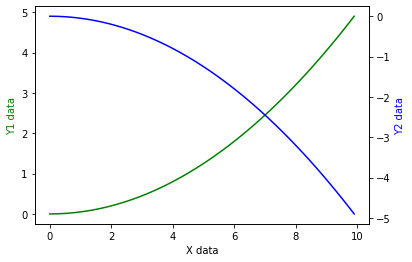

In [67]:
x= np.arange(0,10,0.1)
y1 = 0.05 * x ** 2
y2 = -1 * y1

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data',color = 'g')
ax2.set_ylabel('Y2 data',color = 'b')

plt.show()

## animation动画

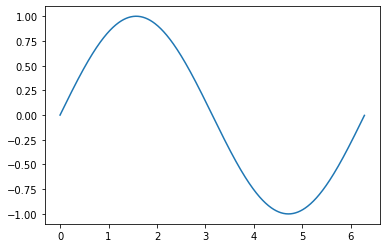

In [68]:
from matplotlib import animation

fig,ax = plt.subplots()

x = np.arange(0,2*np.pi,0.01)
#因为这里返回的是一个列表，但是我们只想要第一个值
#所以这里需要加,号
line, = ax.plot(x,np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))#updata the data
    return line,

def init():
    line.set_ydata(np.sin(x))
    return line,


# call the animator.  blit=True means only re-draw the parts that have changed.
# blit=True dose not work on Mac, set blit=False
# interval= update frequency
#frames帧数
ani = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init,
                              interval=20, blit=False)

plt.show()